# Conexão com postgres e Relatórios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

### Importando bibliotecas

In [1]:
import seaborn as sns
import pandas as pd
import psycopg2

/media/mso2/DATA/Backups_dinamicos/mv_permanentes_linux/Integrado/env35/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Usando psycopg2 para configurar conexão

In [2]:
conn = psycopg2.connect(host="localhost",database="empresa", user="postgres", password="123456")

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Obter o número de supervisionados de cada supervisor


Código para obtenção do resultado:

In [3]:
test = pd.read_sql_query("""
                            select nome, count(rg_supervisor) as qtd_supervisionados
                            
                            from empregado as e 
                            inner join empregado_projeto ep 
                            on e.rg = ep.rg_empregado 
                            group by nome
                            """,conn)

In [4]:
test

,nome,qtd_supervisionados
0,João Antonio,1
1,Ricardo,1
2,Fernanda,2
3,Renata,1
4,Jorge,1


# Relatorio2

### Objetivo: Obter valor médio dos salários por departamento

codigo para obtenção do resultado:

In [5]:
result = pd.read_sql_query("""
                            select dep.nome as departamento,avg(salario) as media_de_salarios_dep
                            from empregado emp 
                            inner join departamento dep
                            on (emp.depto = dep.numero)
                            group by dep.nome
                            order by avg(salario)
                            """,conn)

In [6]:
result

,departamento,media_de_salarios_dep
0,Engenharia Civil,2266.666667
1,Engenharia Mecânica,2500.000000
2,Contabilidade,5150.000000


Alternativamente podemos aplicar estilos a tabela para melhor formatação usando pandas e seaborn

In [7]:
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

,departamento,media_de_salarios_dep
0,Engenharia Civil,2266.67
1,Engenharia Mecânica,2500
2,Contabilidade,5150


Podemos também utilizar o matplotlib que é instalado por padrão com o seaborn

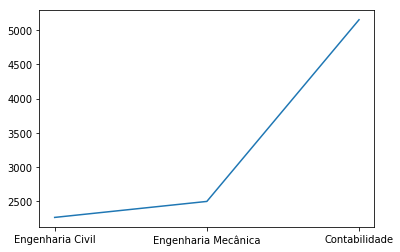

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.departamento, df.media_de_salarios_dep)


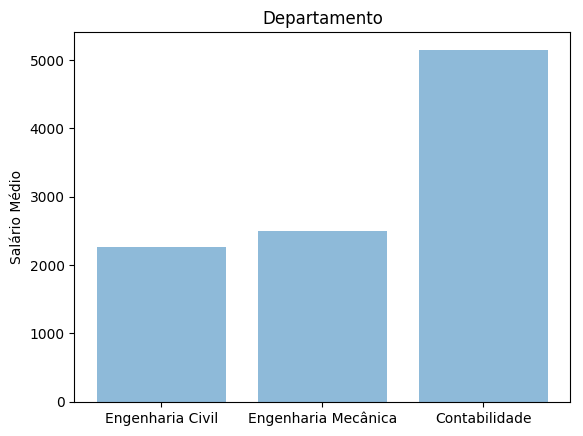

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.departamento)
y_pos = np.arange(len(objects))
performance = list(df.media_de_salarios_dep)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Salário Médio')
plt.title('Departamento')
 
plt.show()

References

## Relatório 3

### Objetivo: Obtenção de aumento de custo de 20% ao ano por funcionário

codigo para obtenção do resultado:

In [10]:
result = pd.read_sql_query("""
                            select nome,
                            salario,
                            salario*1.2 as salario_com_aumento,
                            salario*1.2 - salario as diferenca_valores 
                            from empregado
                            order by diferenca_valores desc
                            """,conn)

In [11]:
result

,nome,salario,salario_com_aumento,diferenca_valores
0,João Luiz,6000.0,7200.0,1200.0
1,Fernanda,5500.0,6600.0,1100.0
2,João Antonio,3950.0,4740.0,790.0
3,Jorge,3200.0,3840.0,640.0
4,Luiz Renato,3000.0,3600.0,600.0
5,Ricardo,2300.0,2760.0,460.0
6,Luiz Fernando,2000.0,2400.0,400.0
7,Renata,1300.0,1560.0,260.0


## Relatório 4

### Objetivo: Obter valor total gasto com salários por departamento, média de valor salarial por departamento, total de horas de trabalho por departamento, e media de horas de trabalho por departamento 

codigo para obtenção do resultado:

In [12]:
result = pd.read_sql_query("""
                            select dept.nome,
                            sum(e.salario) as soma_valor_de_salarios,
                            avg(e.salario) as media_salario,
                            sum(ep.horas) as soma_horas_de_trabalho,
                            avg(ep.horas) as media_horas_trabalho
                            from empregado as e 
                            inner join empregado_projeto ep 
                            on e.rg = ep.rg_empregado 
                            inner join departamento dept
                            on e.depto = dept.numero
                            group by dept.nome
                            """,conn)

In [13]:
result

,nome,soma_valor_de_salarios,media_salario,soma_horas_de_trabalho,media_horas_trabalho
0,Contabilidade,14950.0,4983.333333,105,35.0
1,Engenharia Civil,6800.0,2266.666667,120,40.0


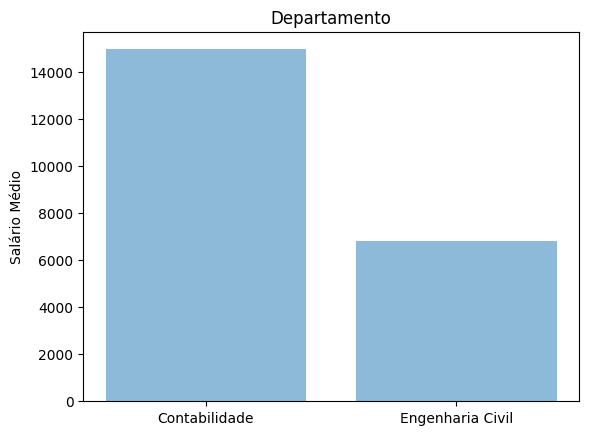

In [14]:
df = pd.DataFrame(result)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.soma_valor_de_salarios)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Salário Médio')
plt.title('Departamento')
 
plt.show()

In [15]:
df.columns

Index(['nome', 'soma_valor_de_salarios', 'media_salario',
       'soma_horas_de_trabalho', 'media_horas_trabalho'],
      dtype='object')

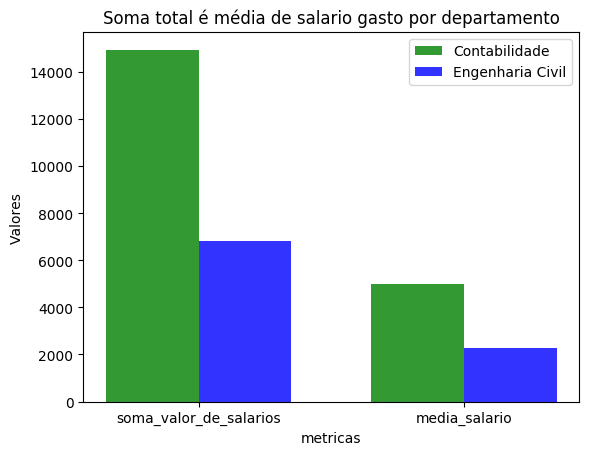

In [16]:
import numpy as np
import matplotlib.pyplot as plt
 
# dados para plotagem
qtd_grupos = len(tuple(df.nome))
index = np.arange(qtd_grupos)
means_dinamic =[]
for i in range (qtd_grupos):
    med_horas =df.loc[[i],'soma_valor_de_salarios']
    med_sal =df.loc[[i],'media_salario']
    medias =tuple([med_horas[i],med_sal[i]])
    means_dinamic.append(medias)

# criando grafico
fig, ax = plt.subplots()
index = np.arange(qtd_grupos)
bar_width = 0.35
opacity = 0.8
cores=['g','b']
 

rects1 = plt.bar(index, means_dinamic[0], bar_width,
                 alpha=opacity,
                 color=cores[0],
                 label=df.nome[0])
 
rects2 = plt.bar(index + bar_width, means_dinamic[1], bar_width,
                 alpha=opacity,
                 color=cores[1],
                 label=df.nome[1])
 
plt.xlabel('metricas')
plt.ylabel('Valores')
plt.title('Soma total é média de salario gasto por departamento')
plt.xticks((index + bar_width/2), ('soma_valor_de_salarios','media_salario'))
plt.legend()
plt.show()

In [17]:
df

,nome,soma_valor_de_salarios,media_salario,soma_horas_de_trabalho,media_horas_trabalho
0,Contabilidade,14950.0,4983.333333,105,35.0
1,Engenharia Civil,6800.0,2266.666667,120,40.0


# Referências

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>